# 🎼 Ejercicio 2.3: Orchestrator-Workers

**Módulo 2: Patrones Multi-Agente**  
**Tiempo estimado**: 10 minutos  
**Ejercicio**: 2.3

---

## 🎯 Objetivos de Aprendizaje

1. ✅ Implementar orchestrator que planifica
2. ✅ Crear workers especializados
3. ✅ Routing dinámico basado en decisiones
4. ✅ Permitir re-planificación


In [1]:
# ╔════════════════════════════════════════════════════════════╗
# ║  📋 SETUP Y VERIFICACIÓN                                  ║
# ╚════════════════════════════════════════════════════════════╝

%pip install -q langgraph langchain-openai python-dotenv

import os, sys
from dotenv import load_dotenv
sys.path.append(os.path.abspath('../..'))
load_dotenv()

print('='*50)
print('   SETUP VERIFICATION')
print('='*50)
print(f"✅ Python {sys.version.split()[0]}")
print(f"{'✅' if os.getenv('OPENAI_API_KEY') else '❌'} OpenAI API Key")
print(f"\n🎬 Ready!\n")

Note: you may need to restart the kernel to use updated packages.
   SETUP VERIFICATION
✅ Python 3.13.7
✅ OpenAI API Key

🎬 Ready!



## 💬 SCRIPT

> "Ejercicio 2.3: Orchestrator-Workers.
> El orchestrator es el 'cerebro' - decide qué workers necesita.
> Los workers son las 'manos' - ejecutan tareas específicas."

In [9]:
from typing import TypedDict, List
from langchain_openai import ChatOpenAI
from langgraph.graph import StateGraph, START, END

class OrchestratorState(TypedDict):
    query: str
    plan: str
    worker_results: List[str]
    final_answer: str

llm = ChatOpenAI(model='gpt-5')
print('✅ Setup')

✅ Setup


In [10]:
# Orchestrator - decide qué hacer

def orchestrator(state):
    '''Decide qué worker necesitamos'''
    query = state['query']
    results = state.get('worker_results', [])
    
    # ¿Ya tenemos suficiente info?
    if len(results) >= 2:
        return {'plan': 'synthesize'}
    
    # Decidir qué worker usar
    prompt = f'''Query: {query}
    Results so far: {results}
    
    ¿Qué worker necesitamos?
    - search_worker: buscar información
    - analyze_worker: analizar datos
    - done: suficiente info
    
    Responde SOLO: search_worker, analyze_worker, o done'''
    
    decision = llm.invoke(prompt).content.strip().lower()
    print(f'🎼 Orchestrator decide: {decision}')
    return {'plan': decision}

print('✅ Orchestrator definido')

✅ Orchestrator definido


In [11]:
# Workers

def search_worker(state):
    print('🔍 Search worker ejecutando...')
    result = f'Búsqueda completada para: {state["query"][:50]}'
    return {'worker_results': [result]}

def analyze_worker(state):
    print('📊 Analyze worker ejecutando...')
    result = f'Análisis completado de: {state["query"][:50]}'
    return {'worker_results': [result]}

def synthesize(state):
    print('🔨 Sintetizando resultados...')
    answer = f'Respuesta basada en: {", ".join(state["worker_results"])}'
    return {'final_answer': answer}

print('✅ Workers definidos')

✅ Workers definidos


In [12]:
# Routing dinámico

def route_decision(state):
    plan = state['plan']
    if plan == 'search_worker':
        return 'search'
    elif plan == 'analyze_worker':
        return 'analyze'
    elif plan == 'synthesize' or plan == 'done':
        return 'synthesize'
    return 'end'

print('✅ Router definido')

✅ Router definido


In [13]:
# Construir grafo

graph = StateGraph(OrchestratorState)

graph.add_node('orchestrator', orchestrator)
graph.add_node('search', search_worker)
graph.add_node('analyze', analyze_worker)
graph.add_node('synthesize', synthesize)

# Orchestrator decide
graph.add_edge(START, 'orchestrator')
graph.add_conditional_edges(
    'orchestrator',
    route_decision,
    {
        'search': 'search',
        'analyze': 'analyze',
        'synthesize': 'synthesize',
        'end': END
    }
)

# Workers vuelven al orchestrator
graph.add_edge('search', 'orchestrator')
graph.add_edge('analyze', 'orchestrator')
graph.add_edge('synthesize', END)

app = graph.compile()
print('✅ Sistema orchestrator-workers compilado')

✅ Sistema orchestrator-workers compilado


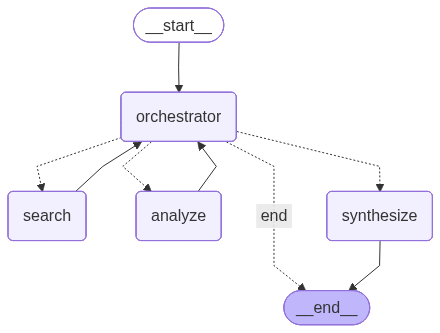

In [14]:
from IPython.display import Image, display
# View
display(Image(app.get_graph().draw_mermaid_png()))

In [15]:
# 🎬 DEMO

query = 'Investiga tendencias de LangGraph en 2024'

print('='*60)
print('🎼 ORCHESTRATOR-WORKERS')
print('='*60)
print(f'Query: {query}\n')

result = app.invoke({'query': query, 'worker_results': []})

print(f'\nResultados de workers: {result["worker_results"]}')
print(f'\nRespuesta final: {result.get("final_answer", "En proceso")}')

🎼 ORCHESTRATOR-WORKERS
Query: Investiga tendencias de LangGraph en 2024

🎼 Orchestrator decide: search_worker
🔍 Search worker ejecutando...
🎼 Orchestrator decide: analyze_worker
📊 Analyze worker ejecutando...
🎼 Orchestrator decide: done
🔨 Sintetizando resultados...

Resultados de workers: ['Análisis completado de: Investiga tendencias de LangGraph en 2024']

Respuesta final: Respuesta basada en: Análisis completado de: Investiga tendencias de LangGraph en 2024


In [16]:
print(result)

{'query': 'Investiga tendencias de LangGraph en 2024', 'plan': 'done', 'worker_results': ['Análisis completado de: Investiga tendencias de LangGraph en 2024'], 'final_answer': 'Respuesta basada en: Análisis completado de: Investiga tendencias de LangGraph en 2024'}


---

## ✅ CHECKPOINT FINAL

- [ ] Código ejecuta sin errores
- [ ] Conceptos clave entendidos
- [ ] Listos para continuar

### 💬 PREGUNTA:
> "¿Alguna duda antes de continuar?"
